### Basic Mushroom Structure
<img src='../../../images/mushrom_structure.gif'>

In [34]:
import pandas as pd
import numpy as np

In [35]:
df=pd.read_csv('mushrooms.csv')
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4860,e,f,s,b,t,n,f,c,b,w,...,s,e,w,p,w,t,e,w,c,w
4517,p,x,y,g,f,f,f,c,b,p,...,k,b,b,p,w,o,l,h,v,g
3445,e,f,y,g,t,n,f,c,b,n,...,s,p,w,p,w,o,p,n,v,d
3454,p,x,f,w,f,c,f,w,n,u,...,s,w,w,p,w,o,p,n,s,d
869,e,x,s,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
5969,p,x,s,g,t,f,f,c,b,p,...,f,w,w,p,w,o,p,h,s,g
5079,e,f,f,e,t,n,f,c,b,n,...,s,g,w,p,w,o,p,n,y,d
4241,p,f,f,g,f,f,f,c,b,g,...,k,p,b,p,w,o,l,h,v,g
676,e,f,f,g,f,n,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
3242,p,x,s,w,f,c,f,c,n,p,...,s,w,w,p,w,o,p,k,s,d


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [37]:
# data exploration 
# check class distributions
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Pie(labels=['non poison','poison'],
           values=df['class'].value_counts())
])
fig.update_layout(title_text='class distributions')
fig.show()

In [38]:
# data exploration
# question 1 : realation between class and cap shape
fig = go.Figure(data=[
    go.Bar(name='non poison',
           x=list(pd.crosstab(df['class'],df['cap-shape']).columns), 
           y=list(pd.crosstab(df['class'],df['cap-shape']).iloc[0])),
    go.Bar(name='poison',
           x=list(pd.crosstab(df['class'],df['cap-shape']).columns),
           y=list(pd.crosstab(df['class'],df['cap-shape']).iloc[1]))])
fig.update_layout(barmode='stack',title_text='relation between class and cap shape')
fig.show()

In [39]:
# question 2 : realation between class and cap-surface
fig = go.Figure(data=[
    go.Bar(name='non posison',x=list(pd.crosstab(df['class'],df['cap-surface']).columns), 
           y=list(pd.crosstab(df['class'],df['cap-surface']).iloc[0])),
    go.Bar(name='posison',x=list(pd.crosstab(df['class'],df['cap-surface']).columns),
           y=list(pd.crosstab(df['class'],df['cap-surface']).iloc[1]))])
fig.update_layout(barmode='stack',title_text='relation between class and cap surface')
fig.show()

In [40]:
# question 3 : realation between class and cap-color
fig = go.Figure(data=[
    go.Bar(name='non posison',x=list(pd.crosstab(df['class'],df['cap-color']).columns), 
           y=list(pd.crosstab(df['class'],df['cap-color']).iloc[0])),
    go.Bar(name='posison',x=list(pd.crosstab(df['class'],df['cap-color']).columns),
           y=list(pd.crosstab(df['class'],df['cap-surface']).iloc[1]))])
fig.update_layout(barmode='stack',title_text='relation between class and cap color')
fig.show()

In [41]:
# question 4 : realation between class and gill spacing
fig = go.Figure(data=[
    go.Bar(name='non posison',x=list(pd.crosstab(df['class'],df['gill-spacing']).columns), 
           y=list(pd.crosstab(df['class'],df['gill-spacing']).iloc[0])),
    go.Bar(name='posison',x=list(pd.crosstab(df['class'],df['gill-spacing']).columns),
           y=list(pd.crosstab(df['class'],df['gill-spacing']).iloc[1]))])
fig.update_layout(barmode='stack',title_text='relation between class and cap gill spacing')
fig.show()

### feature engineering

`first we should note that all features are categorical , so we need to transform them into numerical data 
we mau use pandas.get_dummies() for that purpose also we can use sklearn one-hot encoding , but that will increase our feature vector which may cause the model to overfit , so we need to remove some features
very common technique used with categorical features is to fit a tree based algorithm to find most important features
`

In [42]:
# one hot encode all categorical features
model_df=pd.get_dummies(df.iloc[:,1:])
model_df.sample(10)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3941,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1714,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4702,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4762,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
5142,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6818,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
7133,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
7260,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4187,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6395,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(model_df, df['class'])
fig = go.Figure(data=[
    go.Bar(x=list(model_df.columns), 
           y=model.feature_importances_)])
fig.update_layout(title_text='feature importance')
fig.show()

In [44]:
# select most important features
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(model, prefit=True,threshold=4e-2)
X_new = model.transform(model_df)
print("new features are : {} features ".format(X_new.shape[1]))               

new features are : 7 features 


In [45]:
# now lets train a logistic regression on new features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new,df['class'],test_size=0.2)
#xtrain,xtest,ytrain,ytest=train_test_split(model_df.iloc[:,1:],df['class'],test_size=0.2)
log_reg=LogisticRegression(solver='lbfgs').fit(xtrain,ytrain)

### classification metrics

####################################################

`confusion matrix`

<img src='../../../images/confm.png'>
####################################################

`Accuracy`

<img src='../../../images/acc.png'>

`Accuracy is a good measure when the target variable classes in the data are nearly balanced`

####################################################

`precession`

<img src='../../../images/precession.png'>

###################################################

`recall`

<img src='../../../images/recall.png'>

##################################################

`F1 score is the harmonic mean of precession and recall`

    F1 Score = 2 * Precision * Recall / (Precision + Recall)

In [46]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = log_reg.predict(xtest)
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(ytest,predictions),
                                                                 accuracy_score(ytest, predictions)))

Classification Report :
               precision    recall  f1-score   support

           e       0.97      0.97      0.97       840
           p       0.97      0.97      0.97       785

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625
 
 Model Acurracy = 0.9710769230769231


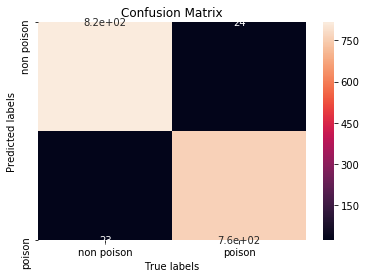

In [47]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = pd.DataFrame(confusion_matrix(ytest, predictions), range(2),range(2))

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_title('Confusion Matrix')
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels')
ax.xaxis.set_ticklabels(['non poison', 'poison']); ax.yaxis.set_ticklabels(['non poison', 'poison']);

In [48]:
confusion_matrix(ytest, predictions)

array([[816,  24],
       [ 23, 762]])